# Artificial and Computational Intelligence Assignment 1

## Problem solving by Uninformed & Informed Search

List all the team members BITS ID ,Name along with % of contribution in this assignment: sample Provided below:
1. 2024ab05257 - Mansi Dnyaneshwar Sukadkar  -   100% 
2. 2024ab05258 - Anurag Vishwajeet Kulkarni  -   100%
3. 2024ab05259 - Devi Jagadeesh              -   100%
4. 2024ab05260 - Veeresh G N                 -   100%
5. 2024ab05261 - Kintul RavindraKumar Upadhyay -  100%

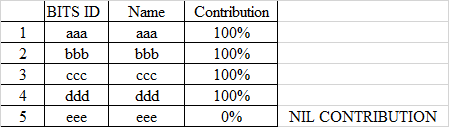

Things to follow
1.	Use appropriate data structures to represent the graph and the path using python libraries
2.	Provide proper documentation
3.	Find the path and print it

Coding begins here

### 1.	Define the environment in the following block

List the PEAS decription of the problem here in this markdown block

Design the agent as PSA Agent(Problem Solving Agent)
Clear Initial data structures to define the graph and variable declarations is expected
IMPORTATANT: Write distinct code block as below

In [1]:
#Code Block : Set Initial State (Must handle dynamic inputs)
import cv2
import numpy as np
from enum import Enum

image = cv2.imread("StateSpace.png")
RabbitPos = []
goal = []
row_input, col_input = 0,0
K = 0


In [2]:
#Code Block : Set the matrix for transition & cost (as relevant for the given problem)


class Block:
    
  #Enum defining cost value for each block depending on block type
  class BlockType(Enum):
    FIRE = 8
    BUSH = 4
    NORMAL = 3
  
  #Initialising Block object
  def __init__(self,top,bottom,right,left,blocktype):
    self.top = top
    self.bottom = bottom
    self.right = right
    self.left = left
    self.blocktype = blocktype

  #Finds block type and walls present for each cell in the provided picture grid and returns Block object
  def subImageProcessor(subimage):
    top = sum(subimage[0,25])/3 < 100
    bottom = sum(subimage[49,25])/3 < 100
    right = sum(subimage[25,49])/3 < 100
    left = sum(subimage[25,0])/3 < 100
    if sum(subimage[25,25])/3 == 255:
      blocktype = Block.BlockType.NORMAL
    elif sum(subimage[25,25])/3 < 100:
      blocktype = Block.BlockType.BUSH
    else :
      blocktype = Block.BlockType.FIRE

    return Block(top,bottom,right,left,blocktype)

#Creates matrix of Block class objects defining each cell in grid
def createMatrix(row_input, col_input):
  for col in range(0,col_input):
    for row in range(0,row_input):
      matrix[row][col]=Block.subImageProcessor(image[(50*row):(50*(row+1)),(50*col):(50*(col+1))])


In [3]:
#Code Block : Write function to design the Transition Model/Successor function. Ideally this would be called while search algorithms are implemented

class TreeNode:

  #Initialising TreeNode object
  def __init__(self,x,y,entry,pathcost, parent = None):
    self.x=x
    self.y=y
    self.entry=entry
    self.parent = parent
    self.heuristic = self.heuristicCal(x,y)
    self.pathcost = pathcost + matrix[x][y].blocktype.value
    self.children = []
    
  #Prints x,y values for node
  def __repr__(self):
    return f"({self.x}, {self.y})"
    
    
  #Calculate Heuristic value for nodes using Manhattan distance
  def heuristicCal(self,x,y):
    return abs(x-goal[0])+abs(y-goal[1])

  
  #Print path from source node to goal node
  def printPath(node):
    path = []
    while node != None:
      path.append(node)
      node = node.parent
    path = path[::-1]
    print("Path ",end="=> ")
    for pathnode in path[0:-1]:
      print(pathnode,end=" -> ")
    print(path[-1])

  #Add children nodes for each node which is to be expanded
  def addNodes(parent):

    if not(matrix[parent.x][parent.y].left) and not(parent.entry == "left") :
      parent.children.append(TreeNode(parent.x,parent.y-1,"right",parent.pathcost, parent))

    if not(matrix[parent.x][parent.y].right) and not(parent.entry == "right") :
      parent.children.append(TreeNode(parent.x,parent.y+1,"left",parent.pathcost, parent))

    if not(matrix[parent.x][parent.y].top) and not(parent.entry == "top") :
      parent.children.append(TreeNode(parent.x-1,parent.y,"bottom",parent.pathcost, parent))

    if not(matrix[parent.x][parent.y].bottom) and not(parent.entry == "bottom") :
      parent.children.append(TreeNode(parent.x+1,parent.y,"top",parent.pathcost, parent))


In [4]:
#Code block : Write fucntion to handle goal test (Must handle dynamic inputs). Ideally this would be called while search algorithms are implemented

def isGoal(node):
    return node.heuristic == 0 

### 2.	Definition of Algorithm 1 (Greedy best first Search Algorithm)

In [5]:
#Code Block : Function for Greedy best first Search Algorithm implementation

#Expanding tree based on minimum heuristic value starting with source node
def expandTreeGreedy(parentNode):
  if len(parentNode.children) == 0:
    print("No solution")
    return
  newParentNode = min(parentNode.children[::-1], key=lambda child: child.heuristic)
  if isGoal(newParentNode) :
    print("Goal reached , Pathcost: ",newParentNode.pathcost)
    TreeNode.printPath(newParentNode)
    return
  TreeNode.addNodes(newParentNode)
  expandTreeGreedy(newParentNode)


### 3.	Definition of Algorithm 2 (Local Beam Search Algorithm)

In [6]:
#Code Block : Function for Local Beam Search Algorithm implementation

#Expanding K nodes based on minimum heuristic value starting with source node
def expandTreeLocalBeam(listnode):
  childlist = []
  for node  in listnode:
    if isGoal(node):
      print("Goal reached , Pathcost: ",node.pathcost)
      TreeNode.printPath(node)
      return
    TreeNode.addNodes(node)
    childlist.extend(node.children)

  if len(childlist)== 0:
    print("No solution")
    return
  childlist.sort(key=lambda child: child.heuristic)
  expandTreeLocalBeam(childlist[0:K])

### DYNAMIC INPUT

IMPORTANT : Dynamic Input must be got in this section. Display the possible states to choose from:
This is applicable for all the relevent problems as mentioned in the question.

In [7]:
#Code Block : Function & call to get inputs (start/end state)


def main():
  global matrix
  matrix = np.empty((row_input,col_input),dtype=object)
  createMatrix(row_input, col_input)
  global rootnode
  rootnode = TreeNode(RabbitPos[0],RabbitPos[1],entry,0)
  if isGoal(rootnode) :
    print("Goal reached , Pathcost: ",rootnode.pathcost)

  TreeNode.addNodes(rootnode)



while True:
    try:
        row_input, col_input = map(int, input("Enter number of rows and columns separated by space: ").split())
        if row_input > 0 and col_input > 0:
            RabbitPos = list(map(int, input("Enter rabbit position separated by space: ").split()))
            entry = input("Enter entry direction [top,bottom,right,left]: ")
            goal = list(map(int, input("Enter goal position separated by space: ").split()))
            if RabbitPos[0] >= 0 and RabbitPos[0] < row_input and RabbitPos[1] >= 0 and RabbitPos[1] < col_input and goal[0] >= 0 and goal[0] < row_input and goal[1] >= 0 and goal[1] < col_input:
                main()
                break
            else:
                print("Invalid input. Please enter values within the specified range.")
        else:
            print("Invalid input. Please enter positive numbers only.")
    except ValueError:
        print("Invalid input. Please enter two numbers separated by space.")




Enter number of rows and columns separated by space: 7 6
Enter rabbit position separated by space: 0 2
Enter entry direction [top,bottom,right,left]: top
Enter goal position separated by space: 6 4


### 4.	Calling the search algorithms
(For bidirectional search in below sections first part can be used as per Hint provided. Under second section other combinations as per Hint or your choice of 2 algorithms can be called .As an analyst suggest suitable approximation in the comparitive analysis section)

In [8]:
#Invoke algorithm 1 (Should Print the solution, path, cost etc., (As mentioned in the problem))

expandTreeGreedy(rootnode)

Goal reached , Pathcost:  27
Path => (0, 2) -> (1, 2) -> (2, 2) -> (3, 2) -> (4, 2) -> (4, 3) -> (4, 4) -> (5, 4) -> (6, 4)


In [9]:
#Invoke algorithm 2 (Should Print the solution, path, cost etc., (As mentioned in the problem))
while K <= 0:
    K = int(input("Enter K value for Local Beam Search Algorithm (K > 0): "))
expandTreeLocalBeam(rootnode.children)

Enter K value for Local Beam Search Algorithm (K > 0): 3
Goal reached , Pathcost:  27
Path => (0, 2) -> (1, 2) -> (2, 2) -> (3, 2) -> (4, 2) -> (4, 3) -> (4, 4) -> (5, 4) -> (6, 4)


### 5.	Comparitive Analysis (Time and Space Complexity)


1. Greedy best first Search Algorithm:
  
  
    Time Complexity: O(b * d)

        - Recursive calls: O(d) (depth of search tree).
        
        - addNodes(): O(b) (adds up to 4 child nodes).
        
        - min(): O(b) (finds child with lowest heuristic).


    Space Complexity: O(d)

        - Call stack: O(d) (recursion depth).
        
        - parentNode and newParentNode: O(1) (constant space).
        
        - children list: O(b) (stores child nodes).s
 



2. Local Beam Search Algorithm:


    Time Complexity: O(K^d) (but reduced in practice due to beam width)

        - Iterating listnode: O(K) (processes limited nodes per level).

        - addNodes(): O(b)  (adds up to 4 child nodes).

        - Sorting childlist: O(n log n) (based on heuristic values).

        - Recursive calls: O(d) (search depth).


    Space Complexity: O(d)

        - listnode: O(K) (limited by beam width).

        - childlist: O(b) (stores child nodes).

        - Call stack: O(d) (recursive depth).

### 6.	Provide your comparitive analysis or findings in no more than 3 lines in below section

1) Greedy BFS may quickly locate a path but does not ensure minimal cost.

2) Local Beam Search can balance among multiple candidates, often yielding better paths.

3) Optimal performance depends on tuning parameters (like beam width k).
